In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
m = np.array(pd.read_csv('graph_partition_dataset_2.csv'))
m.shape

(13, 13)

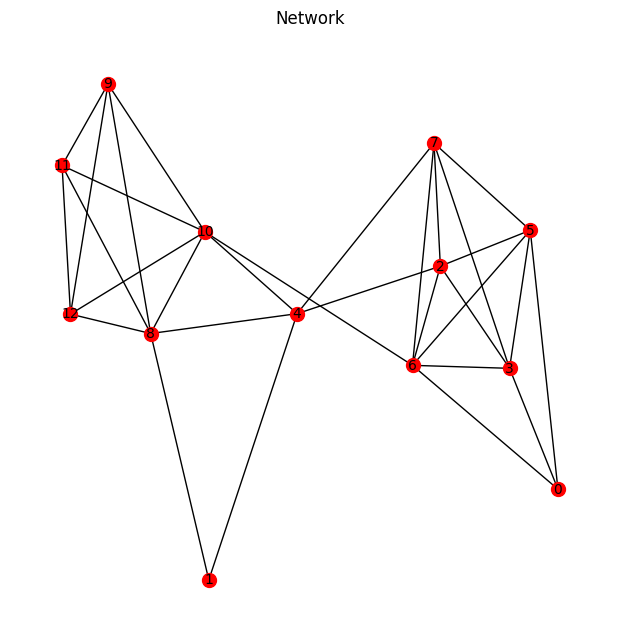

In [ ]:
n = 13  # no.of nodes
G = nx.from_numpy_array(m)
plt.figure(figsize=(6,6))
nx.draw(G,with_labels =True,node_color = 'red',node_size = 100,font_size = 10)
plt.title('Network')
plt.show()

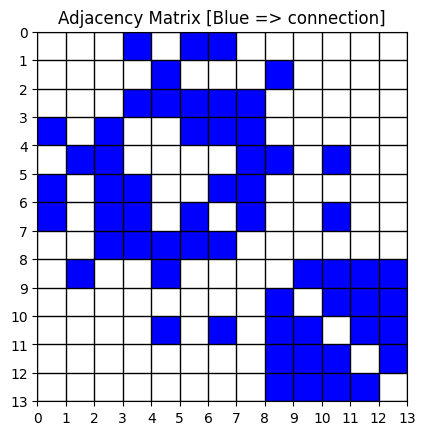

[[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]]


In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots()
for i in range(13):
    for j in range(13):
        if(m[i][j] == 1):
            ax.add_patch(patches.Rectangle((i,12-j),1,1,linewidth=1,facecolor="blue"))
plt.title("Adjacency Matrix [Blue => connection]")
plt.xticks(np.arange(0, m.shape[1]+0.1, 1),(np.arange(14)))
plt.yticks(np.arange(0, m.shape[0]+0.1, 1),reversed(np.arange(14)))
plt.grid(color="black", linestyle="-", linewidth=1)
plt.gca().set_aspect("equal",adjustable="box")
plt.show()
print(m)

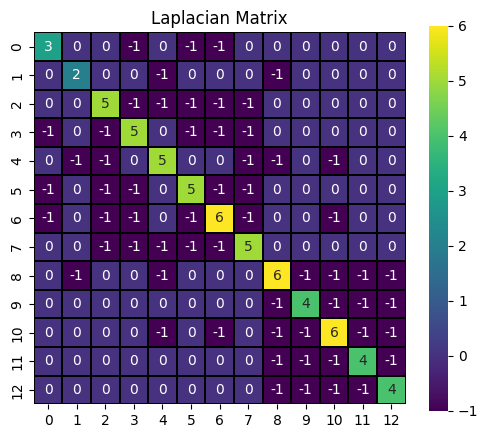

In [ ]:
import seaborn as sns

deg = np.diag(np.sum(m, axis=1))
L = deg - m
plt.figure(figsize=(6,5))
sns.heatmap(L,cmap="viridis",annot=True,cbar=True, linewidths=0.01,linecolor="black",square=True)
plt.title("Laplacian Matrix")
plt.show()

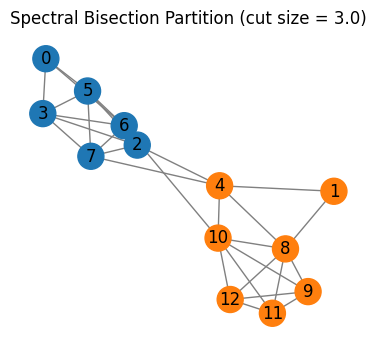

cut size is 3.0


In [ ]:
from scipy.linalg import eigh

_,eig_vectors = eigh(L)
fiedler_vector = eig_vectors[:, 1]
partition = fiedler_vector > 0
cut_size = 0.0
print(fiedler_vector)
print(partition)
for i in range(n):
    for j in range(i+1, n):
        if (partition[i] != partition[j]) and (m[i, j] != 0):
            cut_size += m[i, j]

pos = nx.spring_layout(G, seed=42)
colors = ["tab:blue" if partition[i] else "tab:orange" for i in range(n)]
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
nx.draw(G, pos=pos, with_labels=True, node_color=colors, node_size=350, edge_color="gray")
plt.title(f"Spectral Bisection Partition (cut size = {cut_size})")
plt.show()

print("cut size is",cut_size)